In [51]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [52]:
df = pd.read_csv("MultiJetRun2010B.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     21726 non-null  int64  
 1   Lumi    21726 non-null  int64  
 2   Event   21726 non-null  int64  
 3   MR      21726 non-null  float64
 4   Rsq     21726 non-null  float64
 5   E1      21726 non-null  float64
 6   Px1     21726 non-null  float64
 7   Py1     21726 non-null  float64
 8   Pz1     21726 non-null  float64
 9   E2      21726 non-null  float64
 10  Px2     21726 non-null  float64
 11  Py2     21726 non-null  float64
 12  Pz2     21726 non-null  float64
 13  HT      21726 non-null  float64
 14  MET     21726 non-null  float64
 15  nJets   21726 non-null  int64  
 16  nBJets  21726 non-null  int64  
dtypes: float64(12), int64(5)
memory usage: 2.8 MB


In [53]:
features = ['MR', 'Rsq']
X = df[features]

In [54]:
K = 4
kmeans = KMeans(n_clusters=K)
df['Cluster'] = kmeans.fit_predict(X)

In [55]:
centers = kmeans.cluster_centers_
center_df = pd.DataFrame(centers, columns=features)

Text(0.5, 1.0, 'K-Means Clustering of MultiJet Data (k=4)')

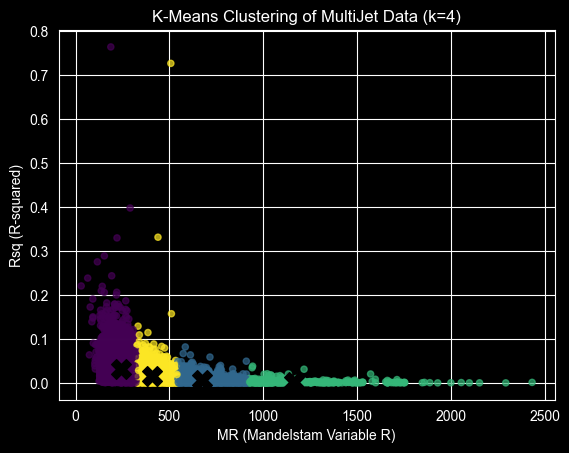

In [56]:
scatter = plt.scatter(df['MR'], df['Rsq'], c=df['Cluster'], cmap='viridis', s=20, alpha=0.7)
plt.scatter(center_df['MR'], center_df['Rsq'], marker='X', s=200, color='black', label='Centers')
plt.xlabel('MR (Mandelstam Variable R)')
plt.ylabel('Rsq (R-squared)')
plt.title(f'K-Means Clustering of MultiJet Data (k={K})')